## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [118]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16, ResNet50
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style('darkgrid')

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [82]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
from google.colab import drive
drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [83]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/My Drive/colab data/Cats_and_Dogs/train'
val =   '/content/drive/My Drive/colab data/Cats_and_Dogs/val'
test =  '/content/drive/My Drive/colab data/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000 
# validation set size 
nb_validation_samples = 2490 
# test set size
nb_test_samples = 2500 

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [84]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [85]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [86]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

10 epoches

In [87]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
312/312 [==============================] - 84s 268ms/step - loss: 0.6946 - accuracy: 0.5595 - val_loss: 0.5812 - val_accuracy: 0.6982
Epoch 2/10
312/312 [==============================] - 83s 265ms/step - loss: 0.5758 - accuracy: 0.6980 - val_loss: 0.5258 - val_accuracy: 0.7492
Epoch 3/10
312/312 [==============================] - 83s 265ms/step - loss: 0.5113 - accuracy: 0.7469 - val_loss: 0.4490 - val_accuracy: 0.7981
Epoch 4/10
312/312 [==============================] - 82s 263ms/step - loss: 0.4494 - accuracy: 0.7967 - val_loss: 0.4185 - val_accuracy: 0.8018
Epoch 5/10
312/312 [==============================] - 82s 263ms/step - loss: 0.4007 - accuracy: 0.8234 - val_loss: 0.3909 - val_accuracy: 0.8141
Epoch 6/10
312/312 [==============================] - 82s 263ms/step - loss: 0.3683 - accuracy: 0.8371 - val_loss: 0.3865 - val_accuracy: 0.8298
Epoch 7/10
312/312 [==============================] - 82s 261ms/step - loss: 0.3200 - accuracy: 0.8654 - val_loss: 0.3832 - val_ac

In [88]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 83.65%


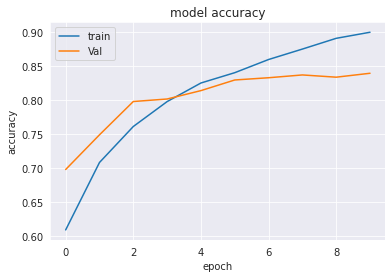

In [93]:
# summarize history for accuracy
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

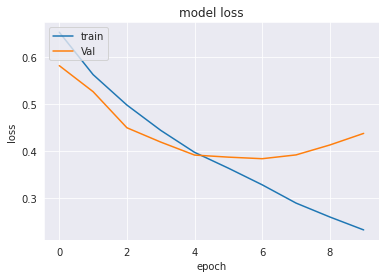

In [94]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

15 epochs

In [89]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history1 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
312/312 [==============================] - 82s 262ms/step - loss: 0.2055 - accuracy: 0.9128 - val_loss: 0.4587 - val_accuracy: 0.8388
Epoch 2/15
312/312 [==============================] - 81s 261ms/step - loss: 0.1840 - accuracy: 0.9216 - val_loss: 0.4950 - val_accuracy: 0.8326
Epoch 3/15
312/312 [==============================] - 82s 261ms/step - loss: 0.1620 - accuracy: 0.9295 - val_loss: 0.4550 - val_accuracy: 0.8388
Epoch 4/15
312/312 [==============================] - 82s 261ms/step - loss: 0.1534 - accuracy: 0.9344 - val_loss: 0.4937 - val_accuracy: 0.8310
Epoch 5/15
312/312 [==============================] - 81s 259ms/step - loss: 0.1317 - accuracy: 0.9420 - val_loss: 0.5534 - val_accuracy: 0.8355
Epoch 6/15
312/312 [==============================] - 81s 260ms/step - loss: 0.1226 - accuracy: 0.9457 - val_loss: 0.5887 - val_accuracy: 0.8409
Epoch 7/15
312/312 [==============================] - 81s 260ms/step - loss: 0.1159 - accuracy: 0.9490 - val_loss: 0.6694 - val_ac

In [90]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 83.89%


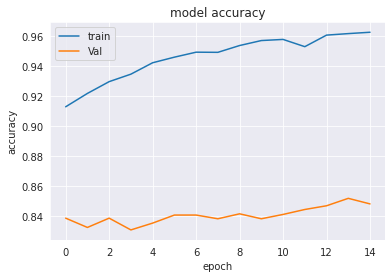

In [95]:
# summarize history for accuracy
history1.history.keys()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

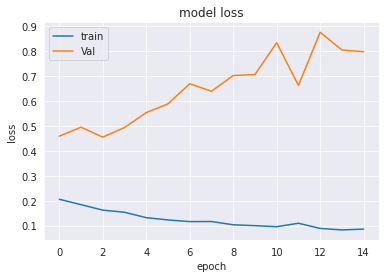

In [96]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

20 Epochs

In [91]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history2 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
312/312 [==============================] - 81s 260ms/step - loss: 0.0751 - accuracy: 0.9651 - val_loss: 0.7956 - val_accuracy: 0.8438
Epoch 2/20
312/312 [==============================] - 82s 262ms/step - loss: 0.0784 - accuracy: 0.9644 - val_loss: 0.7556 - val_accuracy: 0.8396
Epoch 3/20
312/312 [==============================] - 81s 261ms/step - loss: 0.0751 - accuracy: 0.9657 - val_loss: 0.9048 - val_accuracy: 0.8454
Epoch 4/20
312/312 [==============================] - 82s 263ms/step - loss: 0.0734 - accuracy: 0.9657 - val_loss: 1.0074 - val_accuracy: 0.8433
Epoch 5/20
312/312 [==============================] - 82s 261ms/step - loss: 0.0791 - accuracy: 0.9639 - val_loss: 0.8786 - val_accuracy: 0.8421
Epoch 6/20
312/312 [==============================] - 82s 263ms/step - loss: 0.0741 - accuracy: 0.9660 - val_loss: 0.9565 - val_accuracy: 0.8368
Epoch 7/20
312/312 [==============================] - 82s 263ms/step - loss: 0.0684 - accuracy: 0.9672 - val_loss: 0.9904 - val_ac

In [92]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 83.89%


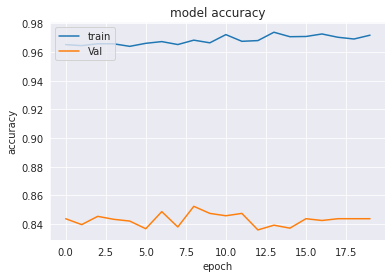

In [97]:
# summarize history for accuracy
history2.history.keys()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

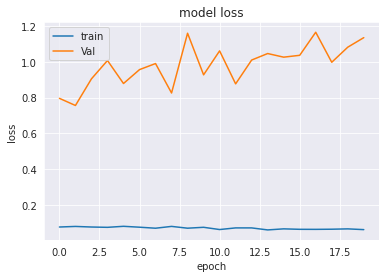

In [98]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

The model is 84% accurate. The model reaches a good level of accuracy after epoch 5 and begins to stabilize after epoch 10.
As the epochs increase the accuracy of the model is increasing
It is recommended in this type of models to use a GPU, due to the amount of time a normal computer requires.

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

##VGG16-Model

In [99]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [100]:


model_vgg16 = Sequential()
model_vgg16.add(vgg16_net) 


model_vgg16.add(Flatten())
model_vgg16.add(Dense(256))
model_vgg16.add(Activation('relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1))
model_vgg16.add(Activation('sigmoid'))

model_vgg16.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               2097408   
_________________________________________________________________
activation_112 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_113 (Activation)  (None, 1)                

In [101]:
model_vgg16.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [102]:

history3=model_vgg16.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
312/312 [==============================] - 92s 292ms/step - loss: 0.5923 - accuracy: 0.6709 - val_loss: 0.3517 - val_accuracy: 0.8614
Epoch 2/5
312/312 [==============================] - 91s 291ms/step - loss: 0.3627 - accuracy: 0.8388 - val_loss: 0.2990 - val_accuracy: 0.8820
Epoch 3/5
312/312 [==============================] - 90s 290ms/step - loss: 0.3042 - accuracy: 0.8712 - val_loss: 0.2711 - val_accuracy: 0.8927
Epoch 4/5
312/312 [==============================] - 91s 291ms/step - loss: 0.2821 - accuracy: 0.8804 - val_loss: 0.2605 - val_accuracy: 0.8951
Epoch 5/5
312/312 [==============================] - 91s 290ms/step - loss: 0.2610 - accuracy: 0.8878 - val_loss: 0.2498 - val_accuracy: 0.9017


In [103]:
scores = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 89.34%


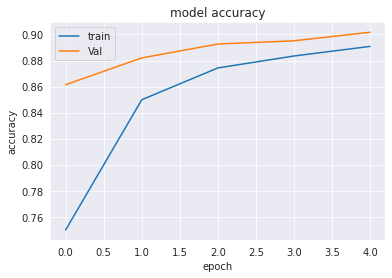

In [104]:
# summarize history for accuracy
history3.history.keys()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

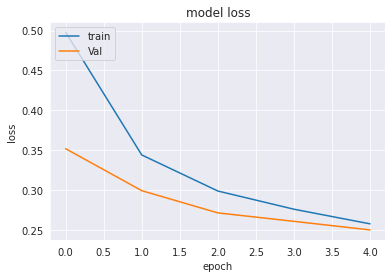

In [105]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

##ResNet50-Model

In [119]:
ResNet50_net = ResNet50(weights='imagenet', 
                  include_top=False,      
                  input_shape=(150, 150, 3))
ResNet50_net.trainable = False             
                                          
ResNet50_net.summary()   

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [121]:
model_res = Sequential()
model_res.add(ResNet50_net) 

model_res.add(Flatten())
model_res.add(Dense(256))
model_res.add(Activation('relu'))
model_res.add(Dropout(0.5))
model_res.add(Dense(1))
model_res.add(Activation('sigmoid'))

model_res.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               13107456  
_________________________________________________________________
activation_212 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_213 (Activation)  (None, 1)                

In [122]:
model_res.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [123]:

history4=model_res.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
312/312 [==============================] - 94s 293ms/step - loss: 0.7063 - accuracy: 0.5480 - val_loss: 0.6483 - val_accuracy: 0.6349
Epoch 2/5
312/312 [==============================] - 90s 289ms/step - loss: 0.6493 - accuracy: 0.6215 - val_loss: 0.6351 - val_accuracy: 0.6431
Epoch 3/5
312/312 [==============================] - 90s 290ms/step - loss: 0.6364 - accuracy: 0.6422 - val_loss: 0.6280 - val_accuracy: 0.6414
Epoch 4/5
312/312 [==============================] - 90s 288ms/step - loss: 0.6261 - accuracy: 0.6590 - val_loss: 0.6198 - val_accuracy: 0.6653
Epoch 5/5
312/312 [==============================] - 90s 288ms/step - loss: 0.6157 - accuracy: 0.6673 - val_loss: 0.6028 - val_accuracy: 0.6838


In [126]:
scores = model_res.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 68.79%


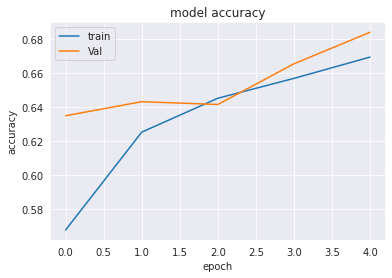

In [127]:
# summarize history for accuracy
history4.history.keys()
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

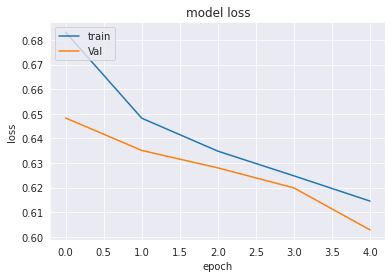

In [128]:
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

In [113]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.image as mpimg

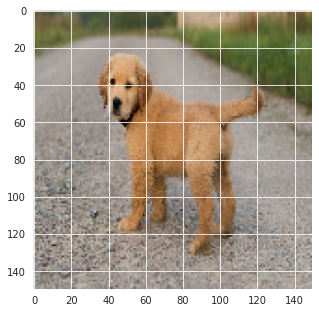

[[1]]
dogs
[[1]]
dogs
[[1]]
dogs


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [138]:
img = image.load_img('/content/drive/My Drive/colab data/Cats_and_Dogs/log/puppy-dog.jpg', target_size=(img_width, img_height))
img_tensor = image.img_to_array(img)                   
img_tensor = np.expand_dims(img_tensor, axis=0)         
imag = np.vstack([img_tensor])
plt.figure(figsize = (5,8))
plt.imshow(img)
plt.show()
cls={0:'cats', 1:'dogs'}
mod=[model,model_res,model_vgg16]
for i in mod:
  classes=i.predict_classes(imag, batch_size=64)
  print(classes)
  print(cls[classes[0][0]])
